<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week1_session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**曽呂利新左衛門問題**


曽呂利新左衛門の逸話を題材にプログラミングを勉強する。
>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる事に途中で気づき、他の褒美に変えてもらった。



In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### **問題1　100目の米粒の数**
100日目には米粒が何粒になるかを算出する関数を作成。また、その日にもらう米とその日までにもらった米の累計の数の推移を折れ線グラフにする。（縦軸が米の数、横軸が日数)

その日にもらう米の数： [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 17179869184, 34359738368, 68719476736, 137438953472, 274877906944, 549755813888, 1099511627776, 2199023255552, 4398046511104, 8796093022208, 17592186044416, 35184372088832, 70368744177664, 140737488355328, 281474976710656, 562949953421312, 1125899906842624, 2251799813685248, 4503599627370496, 9007199254740992, 18014398509481984, 36028797018963968, 72057594037927936, 144115188075855872, 288230376151711744, 576460752303423488, 1152921504606846976, 2305843009213693952, 4611686018427387904, 9223372036854775808, 18446744073709551616, 36893488147419103232, 73786976294838206464, 147573952589676412928, 295147905179352825856, 590295810358705651712, 1180591620717411303424, 2361183241434822606848, 4722366482869645213696, 944473296573

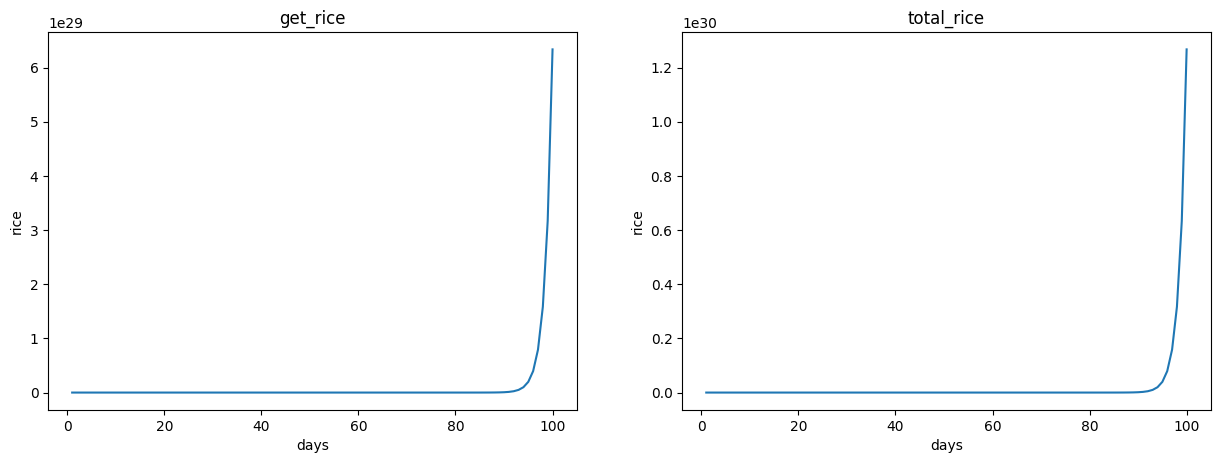

In [74]:
def multiply(days):
    
    """
    その日にもらうコメの数のリストと累計のリストを返す

    Paramater
    days : int
    米をもらう日数

    Return
    list_get_rice : list
    その日にもらう数のリスト
    list_total_rice : list
    累計のリスト
    """
    list_get_rice = [1]
    list_total_rice = [1]
    for _ in range(days-1):
        get_rice = 2*list_get_rice[-1]
        list_get_rice.append(get_rice)
        list_total_rice.append(list_total_rice[-1] + get_rice)
    print('その日にもらう米の数：', list_get_rice)
    print('その日までの米の累計：', list_total_rice)

    fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', linewidth=0, edgecolor='w')
    ax1 = fig.add_subplot(121, title='get_rice', xlabel='days', ylabel='rice')
    ax2 = fig.add_subplot(122, title='total_rice', xlabel='days', ylabel='rice')
    ax1.plot(range(1, days+1), list_get_rice)
    ax2.plot(range(1, days+1), list_total_rice)


multiply(100)

もらう数を2乗のブロードキャスト で算出しようとしたが、ndarrayで処理できる数値は最大で$2^{62}$までなので、100を引数で渡すと63日目の数の符号がーになり、64日目から0になってしまう。

In [73]:
def multiply2(days):
    """
    Paramater
    days : int
    米をもらう日数

    Return
    array_rice : array
    もらったコメの数が格納された配列
    """
    array_rice = 2 ** np.arange(0, days)
    return array_rice

failure = multiply2(100)
print("63日目にもらう米の数", failure[63])
print("64日目にもらう米の数", failure[64])

63日目にもらう米の数 -9223372036854775808
64日目にもらう米の数 0


### **問題2　100日目以外の米粒の数**
他の日数を渡しても動くように関数を作る。→問題1で作ったため省略。


### **問題3　もらえる米で何人が何日生活できるか？**
もらった米でコース受講生（9人）が何日生きられるかを計算する関数を作る。
* 関数の引数は、米の数と人数
* 出力は生活できる日数
* 1日にご飯1合（150g）食べるとすると、米粒は1000粒でおおよそ22.5gくらいなので、(150÷22.5)×1000 = 6,666粒で計算する。　


In [75]:
# その日の累計の数だけわかれば良いので、不要な部分を削除
def get_total(days):
    """
    その日までの累計のリストを返す

    Paramater
    days : int
    米をもらう日数

    Return
    list_total_rice : list
    累計のリスト
    """
    list_get_rice = [1]
    list_total_rice = [1]
    for _ in range(days-1):
        get_rice = 2*list_get_rice[-1]
        list_get_rice.append(get_rice)
        list_total_rice.append(list_total_rice[-1] + get_rice)
    return list_total_rice[-1]

In [95]:
def days_to_survive(rice, num_person):
    """
    もらった米粒で人々が何日生きられるか計算する関数

    Paramater
    rice : int
    米粒の数
    num_person : int
    人々の人数

    Return
    days : int
    生活できる日数
    """
    how_days = rice / (num_person * 6666)
    return int(how_days)

print('{}日目に確保してる米粒：{}粒'.format(100, get_total(100)))
print('9人が生きれる日数：{}日'.format(days_to_survive(get_total(100), 9)))

100日目に確保してる米粒：1267650600228229401496703205375粒
9人が生きれる日数：21129622966100434092032000日
